## 1. Data Loading and preparation

In [1]:
# Import core libraries
import pandas as pd

**Data Dictionary**

This section clarifies the meaning of our columns, especially the coded features.

* **age_years**: Age of the patient (in years).
* **gender**: 1: Male, 2: Female
* **height_cm**: Height in centimeters.
* **weight_kg**: Weight in kilograms.
* **systolic_bp**: Systolic blood pressure (the "upper" number).
* **diastolic_bp**: Diastolic blood pressure (the "lower" number).
* **cholesterol**: 1: Normal, 2: Above Normal, 3: Well Above Normal
* **glucose**: 1: Normal, 2: Above Normal, 3: Well Above Normal
* **is_smoker**: 0: No, 1: Yes
* **is_alcoholic**: 0: No, 1: Yes
* **is_active**: 0: No, 1: Yes
* **target**: 0: No cardiovascular disease, 1: Presence of cardiovascular disease

In [2]:
# Load the dataset from the data directory
df = pd.read_csv('../data/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Define a mapping for intuitive column names
column_mapping = {
    'age': 'age_days',
    'height': 'height_cm',
    'weight': 'weight_kg',
    'ap_hi': 'systolic_bp',
    'ap_lo': 'diastolic_bp',
    'gluc': 'glucose',
    'smoke': 'is_smoker',
    'alco': 'is_alcoholic',
    'active': 'is_active',
    'cardio': 'target'
}

# Apply the renaming
df = df.rename(columns=column_mapping)

In [4]:
# convert age from days to years
df['age_years'] = (df['age_days'] / 365.25).round().astype(int)

df = df.drop(columns=['id', 'age_days'])

In [5]:
# Define the final column order for the DataFrame
final_columns = [
    'age_years',
    'gender',
    'height_cm',
    'weight_kg',
    'systolic_bp',
    'diastolic_bp',
    'cholesterol',
    'glucose',
    'is_smoker',
    'is_alcoholic',
    'is_active',
    'target'
]

# Re-order the DataFrame
df = df[final_columns]

In [6]:
df.head()

,age_years,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,is_smoker,is_alcoholic,is_active,target
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


## 2. Exploratory Data Analysis (EDA)

In [7]:
# Analyze the distribution of the target variable

print("Target Variable Distribution (0 = No Disease, 1 = Disease):")
target_distribution = df['target'].value_counts(normalize=True)
print(target_distribution)

Target Variable Distribution (0 = No Disease, 1 = Disease):
target
0    0.5003
1    0.4997
Name: proportion, dtype: float64


In [8]:
# Import metrics for feature analysis
from sklearn.metrics import mutual_info_score

In [9]:
# Define lists of categorical and numerical feature names
categorical_features = [
    'gender', 
    'cholesterol', 
    'glucose', 
    'is_smoker', 
    'is_alcoholic', 
    'is_active'
]

numerical_features = [
    'age_years', 
    'height_cm', 
    'weight_kg', 
    'systolic_bp', 
    'diastolic_bp'
]

In [10]:
# 1. Mutual Information (for Categorical)

# Define a function to calculate MI score against the target
def mutual_info_target_score(series):
    return mutual_info_score(series, df['target'])

print("Mutual Information (Categorical Features) ---")

# We apply this function to all categorical columns
mi_scores = df[categorical_features].apply(mutual_info_target_score)
print(mi_scores.sort_values(ascending=False))

print("\n")

# 2. Correlation (for Numerical)
# Calculate Pearson correlation for numerical features against the target
# Use .abs() to measure strength of correlation (positive or negative)

print("Correlation (Numerical Features) ---")
correlation_scores = df[numerical_features].corrwith(df['target']).abs()
print(correlation_scores.sort_values(ascending=False))

Mutual Information (Categorical Features) ---
cholesterol     0.025351
glucose         0.004223
is_active       0.000636
is_smoker       0.000120
gender          0.000033
is_alcoholic    0.000027
dtype: float64


Correlation (Numerical Features) ---
age_years       0.237802
weight_kg       0.181660
diastolic_bp    0.065719
systolic_bp     0.054475
height_cm       0.010821
dtype: float64


/tmp/ipykernel_10129/2045491291.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='pastel')


Saved ../images/target_distribution.png


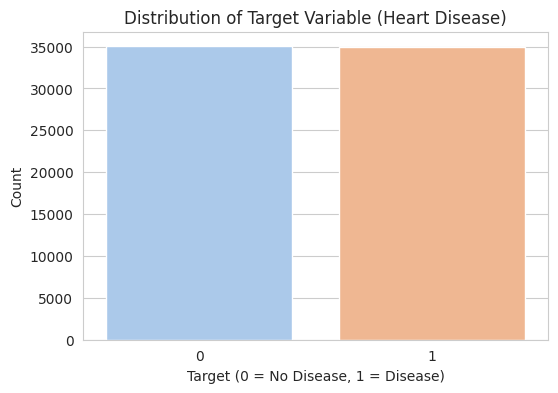

Saved ../images/correlation_heatmap.png


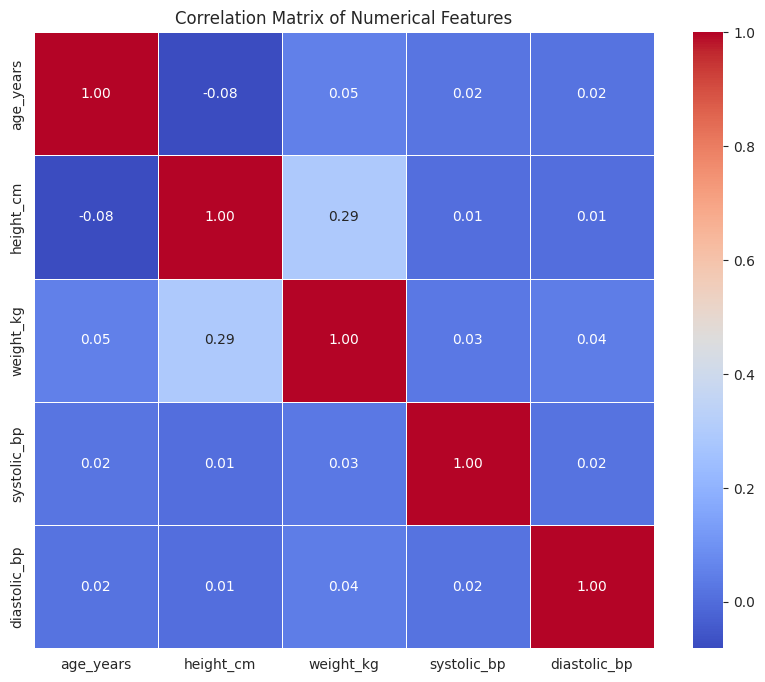

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create directory for saving images if it doesn't exist
save_path = '../images'
os.makedirs(save_path, exist_ok=True)

# Set seaborn style
sns.set_style("whitegrid")

# 1. Target Distribution Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='pastel')
plt.title('Distribution of Target Variable (Heart Disease)')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')

# Save to root images folder
plt.savefig(f'{save_path}/target_distribution.png')
print(f"Saved {save_path}/target_distribution.png")
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')

# Save to root images folder
plt.savefig(f'{save_path}/correlation_heatmap.png')
print(f"Saved {save_path}/correlation_heatmap.png")
plt.show()

## 3. Validation framework

In [12]:
# Import the splitting function
from sklearn.model_selection import train_test_split

In [13]:
# Split the data into 80% (full_train) and 20% (test)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [14]:
# Split the 80% (full_train) into 75% (train) and 25% (validation)
# Final split: 60% train, 20% val, 20% test
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
# extract the target variable (y) from each dataframe
y_train = df_train['target'].values
y_val = df_val['target'].values
y_test = df_test['target'].values

# Remove the target variable from the feature dataframes (X)
# and reset the index
df_train = df_train.reset_index(drop=True)

del df_val['target']
df_val = df_val.reset_index(drop=True)

del df_test['target']
df_test = df_test.reset_index(drop=True)


# Check the final set sizes
print(f"Training set size:   {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size:       {len(df_test)}")

Training set size:   42000
Validation set size: 14000
Test set size:       14000


## 4. Feature engineering (One-Hot Encoding)

In [16]:
# Import the vectorizer for One-Hot Encoding
from sklearn.feature_extraction import DictVectorizer

In [17]:
# Initialize the DictVectorizer
dv = DictVectorizer(sparse=False)

In [18]:
# Convert the training DataFrame to a list of dictionaries
train_dicts = df_train[categorical_features + numerical_features].to_dict(orient='records')

In [19]:
# Fit the vectorizer and transform the training data
X_train = dv.fit_transform(train_dicts)

In [20]:
# Convert the validation DataFrame to a list of dictionaries
val_dicts = df_val[categorical_features + numerical_features].to_dict(orient='records')

In [21]:
# Transform the validation data using the fitted vectorizer
X_val = dv.transform(val_dicts)

In [22]:
# Check the resulting shapes of the feature matrices
print(f"Original DataFrame shape (train): {df_train.shape}")
print(f"New Feature Matrix shape (X_train): {X_train.shape}")
print("\nFeature names created by DictVectorizer:")
print(dv.get_feature_names_out()[:10])

Original DataFrame shape (train): (42000, 12)
New Feature Matrix shape (X_train): (42000, 11)

Feature names created by DictVectorizer:
['age_years' 'cholesterol' 'diastolic_bp' 'gender' 'glucose' 'height_cm'
 'is_active' 'is_alcoholic' 'is_smoker' 'systolic_bp']


In [23]:
# Inspect the resulting feature matrix
X_train

array([[ 50.,   1.,  80., ...,   0., 150.,  84.],
       [ 61.,   1.,  80., ...,   1., 150.,  78.],
       [ 52.,   1.,  80., ...,   0., 120.,  65.],
       ...,
       [ 61.,   1.,  80., ...,   0., 120.,  70.],
       [ 48.,   1.,  80., ...,   0., 120.,  53.],
       [ 42.,   1.,  90., ...,   0., 130.,  80.]], shape=(42000, 11))

## 5. Model training: Logistic Regression

In [24]:
# Import model and preprocessor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [25]:
# initialize the StandardScaler
scaler = StandardScaler()

In [26]:
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation data using the fitted scaler
X_val_scaled = scaler.transform(X_val)

In [27]:
# Initialize the Logistic Regression model
model = LogisticRegression(solver='lbfgs', random_state=1)

In [28]:
# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)
print("Model training complete!")

Model training complete!


## 6. Model evaluation (Validation set)

In [29]:
# Import accuracy metric
from sklearn.metrics import accuracy_score

In [30]:
# Make predictions on the scaled validation data
y_pred_val = model.predict(X_val_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_val, y_pred_val)

print(f"--- Baseline Model (Logistic Regression) ---")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

--- Baseline Model (Logistic Regression) ---
Validation Accuracy: 71.83%


## 7. Model training: Random Forest

In [31]:
# Import the Random Forest model
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train_scaled, y_train)

print("Random Forest model training complete!")

Random Forest model training complete!


In [33]:
# Evaluate the Random Forest model on the validation set
y_pred_rf = rf_model.predict(X_val_scaled)
rf_accuracy = accuracy_score(y_val, y_pred_rf)

print(f"Random Forest Accuracy:     {rf_accuracy * 100:.2f}%")

Random Forest Accuracy:     70.31%


## 8. Final model selection and saving

In [34]:
import pickle
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

print("--- Starting Final Model Training ---")

# 1. Define Categorical and Numerical Features
categorical_features = [
    'gender', 'cholesterol', 'glucose', 'is_smoker', 'is_alcoholic', 'is_active'
]
numerical_features = [
    'age_years', 'height_cm', 'weight_kg', 'systolic_bp', 'diastolic_bp'
]

# 2. Combine Train + Validation data for final training
df_full_train_final = pd.concat([df_train, df_val])
y_full_train_final = pd.concat([pd.Series(y_train), pd.Series(y_val)])


# 3. Define Preprocessing Pipeline

# Helper function for ColumnTransformer
def to_dicts(df):
    return df.to_dict(orient='records')

preprocessor = ColumnTransformer(
    [
        ('num_scaler', StandardScaler(), numerical_features),
        ('cat_encoder', make_pipeline(
            FunctionTransformer(to_dicts),
            DictVectorizer(sparse=False)
        ), categorical_features)
    ],
    remainder='drop'
)

# 4. Create the Final End-to-End Pipeline
final_pipeline = make_pipeline(
    preprocessor,
    LogisticRegression(solver='lbfgs', max_iter=1000, random_state=1)
)

# 5. Train the Final Pipeline
print("Training the full pipeline (this may take a moment)...")
# Train the entire pipeline on the full (unscaled) training data
final_pipeline.fit(df_full_train_final, y_full_train_final)
print("Pipeline training complete!")

# 6. Save the Pipeline to a File
output_file = 'model.bin'

with open(output_file, 'wb') as f_out:
    pickle.dump(final_pipeline, f_out)

print(f"Final Pipeline saved to: {output_file}")

--- Starting Final Model Training ---
Training the full pipeline (this may take a moment)...
Pipeline training complete!
Final Pipeline saved to: model.bin
